<a href="https://colab.research.google.com/github/gyhou/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/LS_DS_224_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [157]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [257]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pylab as pl

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [165]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [166]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [167]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [168]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [169]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [170]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [171]:
df = income.merge(lifespan).merge(population)
print(df.shape)
df.head()

(40437, 5)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [172]:
entities.columns

Index(['country', 'alt_5', 'alternative_1', 'alternative_2', 'alternative_3',
       'alternative_4_cdiac', 'arb1', 'arb2', 'arb3', 'arb4', 'arb5', 'arb6',
       'g77_and_oecd_countries', 'gapminder_list', 'god_id', 'gwid',
       'income_groups', 'is--country', 'iso3166_1_alpha2', 'iso3166_1_alpha3',
       'iso3166_1_numeric', 'iso3166_2', 'landlocked', 'latitude', 'longitude',
       'main_religion_2008', 'name', 'pandg', 'un_state',
       'unicode_region_subtag', 'upper_case_name', 'world_4region',
       'world_6region'],
      dtype='object')

In [173]:
entities_filtered = entities[['country','name','world_6region']]
print(entities_filtered.shape)
entities_filtered.head()

(273, 3)


,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,abw,Aruba,america
2,afg,Afghanistan,south_asia
3,ago,Angola,sub_saharan_africa
4,aia,Anguilla,america


In [174]:
df = pd.merge(df, entities_filtered, left_on='geo', right_on='country')
print(df.shape)
df.head()

(40437, 8)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,south_asia


In [175]:
df = df.drop(columns=['geo','country'])
print(df.shape)
df.head()

(40437, 6)


,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,name,world_6region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [176]:
df = df.rename(columns={
    'time':'year'
    , 'income_per_person_gdppercapita_ppp_inflation_adjusted':'income'
    , 'life_expectancy_years':'lifespan'
    , 'population_total':'population'
    , 'world_6region':'region'
})
df.head()

,year,income,lifespan,population,name,region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [177]:
df['region'] = df['region'].replace('_',' ', regex=True).str.title()
df.head()

,year,income,lifespan,population,name,region
0,1800,603,28.21,3280000,Afghanistan,South Asia
1,1801,603,28.20,3280000,Afghanistan,South Asia
2,1802,603,28.19,3280000,Afghanistan,South Asia
3,1803,603,28.18,3280000,Afghanistan,South Asia
4,1804,603,28.17,3280000,Afghanistan,South Asia



## Explore data

In [178]:
df.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [179]:
df.skew()

year          -0.005098
income         6.300582
lifespan       0.825236
population    13.031487
dtype: float64

In [180]:
df[df['year'] == 2018].skew()

year          0.000000
income        2.056521
lifespan     -0.506461
population    8.224550
dtype: float64

In [181]:
df[df['year'] == 1800].skew()

year           0.000000
income         2.709177
lifespan       0.090251
population    10.199690
dtype: float64

In [182]:
df.describe(exclude='number')

,name,region
count,40437,40437
unique,187,6
top,Costa Rica,Europe Central Asia
freq,219,10778


In [183]:
df['name'].value_counts()

Costa Rica                219
Czech Republic            219
Ireland                   219
Congo, Dem. Rep.          219
Bosnia and Herzegovina    219
Australia                 219
Kenya                     219
Ukraine                   219
Turkey                    219
Mauritania                219
Qatar                     219
Colombia                  219
Lesotho                   219
Spain                     219
Tanzania                  219
Gabon                     219
Syria                     219
Mexico                    219
Swaziland                 219
Togo                      219
Chile                     219
Seychelles                219
Austria                   219
Serbia                    219
Liberia                   219
Philippines               219
Slovak Republic           219
Romania                   219
Kyrgyz Republic           219
Madagascar                219
                         ... 
Equatorial Guinea         219
Eritrea                   219
Nepal     

In [184]:
df_usa = df[df['name'].str.contains('United States') & df['year'].isin([1818,1918,2018])]
df_usa.head()

,year,income,lifespan,population,name,region
38046,1818,2258,39.41,9879049,United States,America
38146,1918,9371,47.18,106721812,United States,America
38246,2018,54898,79.14,326766748,United States,America


## Plot visualization

In [185]:
present = df[df['year'].isin([2018])]
present.head()

,year,income,lifespan,population,name,region
218,2018,1867,58.69,36373176,Afghanistan,South Asia
437,2018,5846,65.19,30774205,Angola,Sub Saharan Africa
656,2018,12424,78.01,2934363,Albania,Europe Central Asia
922,2018,68231,76.89,9541615,United Arab Emirates,Middle East North Africa
1141,2018,18942,76.97,44688864,Argentina,America


## Analyze outliers

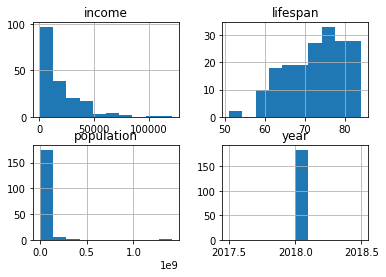

In [186]:
present.hist();

## Plot multiple years

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2018.0, right=2018.0
  ax.set_xlim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6

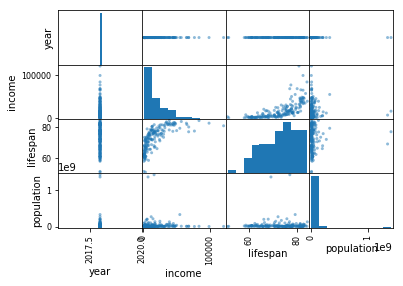

In [187]:
pd.plotting.scatter_matrix(present);

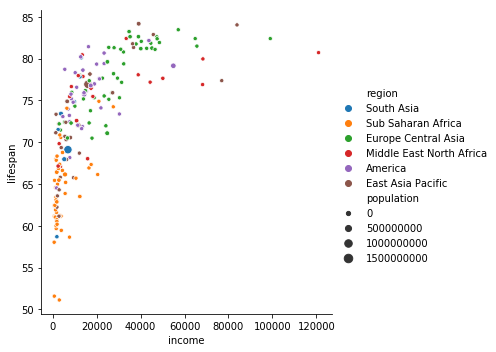

In [188]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', data = present);

In [189]:
present['log_income'] = np.log(present['income'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [190]:
present.describe()

,year,income,lifespan,population,log_income
count,184.0,184.000000,184.000000,1.840000e+02,184.000000
mean,2018.0,17918.809783,72.654511,4.126209e+07,9.170772
std,0.0,19598.831373,7.249927,1.487751e+08,1.225316
min,2018.0,629.000000,51.120000,9.523500e+04,6.444131
25%,2018.0,3527.500000,67.130000,2.831068e+06,8.168329
50%,2018.0,11851.000000,74.015000,9.496864e+06,9.380024
75%,2018.0,25035.250000,78.022500,3.059006e+07,10.127984
max,2018.0,121033.000000,84.170000,1.415046e+09,11.703819


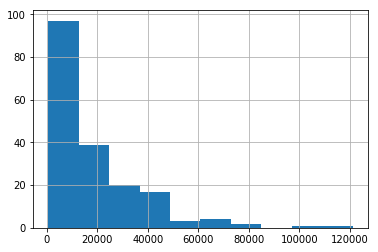

In [191]:
present.income.hist();

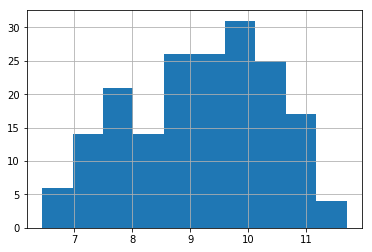

In [192]:
present.log_income.hist();

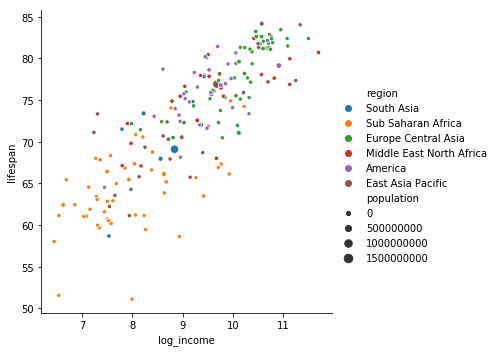

In [193]:
sns.relplot(x='log_income', y='lifespan', hue='region', size='population', data = present);

In [194]:
present[present['log_income'] >= 11].sort_values(by='log_income')

,year,income,lifespan,population,name,region,log_income
27296,2018,64846,82.39,5353363,Norway,Europe Central Asia,11.079771
16956,2018,65622,81.49,4803748,Ireland,Europe Central Asia,11.091666
922,2018,68231,76.89,9541615,United Arab Emirates,Middle East North Africa,11.130654
20241,2018,68359,79.96,4197128,Kuwait,Middle East North Africa,11.132529
5521,2018,76943,77.36,434076,Brunei,East Asia Pacific,11.250820
31895,2018,83888,84.03,5791901,Singapore,East Asia Pacific,11.337238
22212,2018,99034,82.39,590321,Luxembourg,Europe Central Asia,11.503219
30362,2018,121033,80.71,2694849,Qatar,Middle East North Africa,11.703819


In [195]:
qatar = present[present['name'] == 'Qatar']
qatar_income = qatar['log_income'].iloc[0] # 11.7
# qatar_income = qatar['log_income'].values[0]
qatar_lifespan = qatar['lifespan'].iloc[0] # 80.71
print(qatar_income, qatar_lifespan)

11.703818514668283 80.71


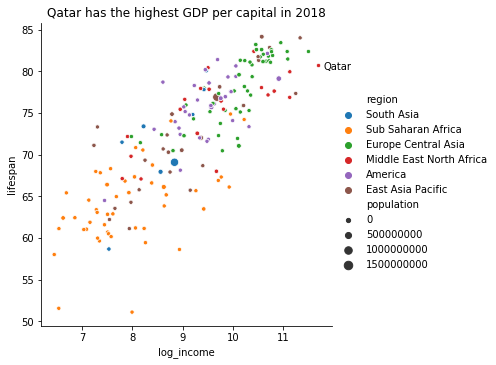

In [196]:
sns.relplot(x='log_income', y='lifespan', hue='region', size='population', data = present);
plt.text(x=qatar_income+.1, y=qatar_lifespan-.5, s='Qatar')
plt.title('Qatar has the highest GDP per capital in 2018');

In [197]:
years = [1818, 1918, 2018]
centuries = df[df['year'].isin(years)]
centuries['log_income'] = np.log(centuries['income'])
centuries.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,year,income,lifespan,population,name,region,log_income
18,1818,604,28.03,3308390,Afghanistan,South Asia,6.403574
118,1918,849,7.89,5704092,Afghanistan,South Asia,6.744059
218,2018,1867,58.69,36373176,Afghanistan,South Asia,7.532088
237,1818,668,26.98,1586896,Angola,Sub Saharan Africa,6.504288
337,1918,1174,12.01,3487015,Angola,Sub Saharan Africa,7.068172


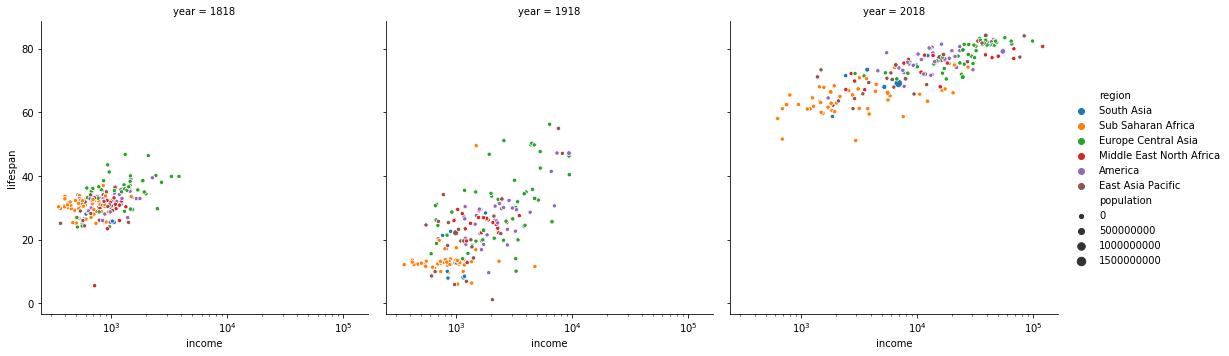

In [198]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            col='year', data = centuries);
plt.xscale('log');

## Point out a story

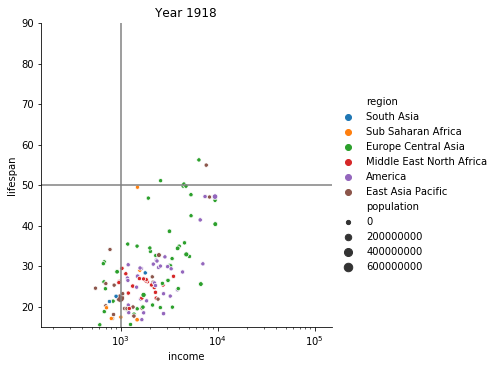

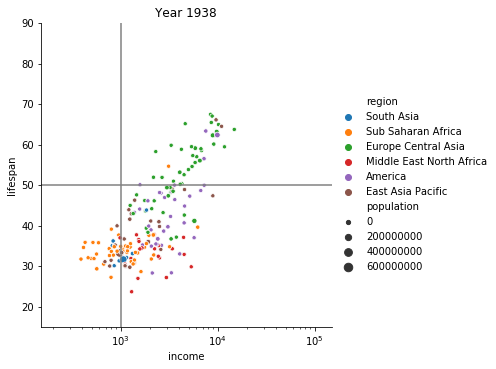

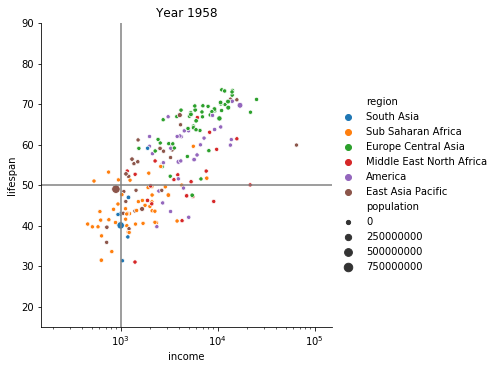

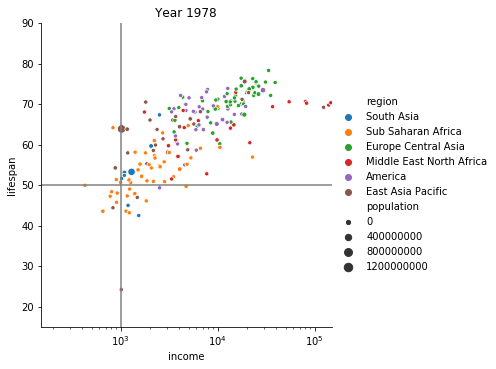

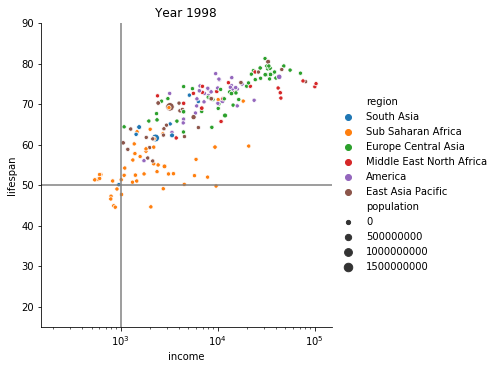

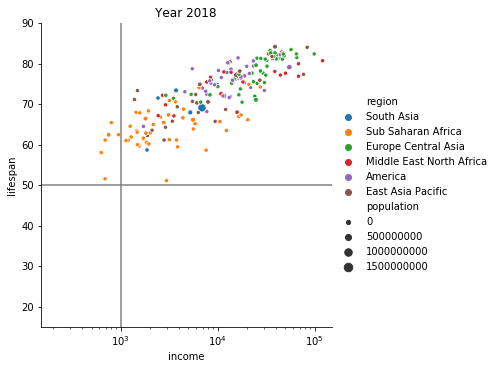

In [199]:
years = [1918, 1938, 1958, 1978, 1998, 2018]

for year in years:
  sns.relplot(x='income', y='lifespan', hue='region', size='population',
              data=df[df['year'] == year])
  plt.xscale('log')
  plt.title('Year ' + str(year))
  plt.xlim(150, 150000)
  plt.ylim(15,90)  
  plt.axhline(y=50, color='grey')
  plt.axvline(x=1000, color='grey')

# ASSIGNMENT
Replicate the lesson code

In [200]:
income.columns, lifespan.columns, population.columns

(Index(['geo', 'time', 'income_per_person_gdppercapita_ppp_inflation_adjusted'], dtype='object'),
 Index(['geo', 'time', 'life_expectancy_years'], dtype='object'),
 Index(['geo', 'time', 'population_total'], dtype='object'))

In [201]:
df = income.merge(lifespan).merge(population)
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [202]:
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [203]:
df = pd.merge(df, entities[['country','name','world_6region']], left_on='geo', right_on='country')
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,south_asia


In [204]:
df = df.drop(columns=['geo','country'])
df.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,name,world_6region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [205]:
df = df.rename(columns={
              'time':'Year'
              , 'income_per_person_gdppercapita_ppp_inflation_adjusted':'Income'
              , 'life_expectancy_years':'Lifespan'
              , 'population_total':'Population'
              , 'name':'Country'
              , 'world_6region':'Region'})
df.head()

,Year,Income,Lifespan,Population,Country,Region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [206]:
df['Region'] = df['Region'].replace('_',' ',regex=True).str.title()
df.sample(5)

,Year,Income,Lifespan,Population,Country,Region
33908,1841,1677,36.60,565715,Slovenia,Europe Central Asia
8528,1959,807,53.42,199906,Cape Verde,Sub Saharan Africa
27205,1927,6029,62.85,2773594,Norway,Europe Central Asia
24645,1995,7809,73.95,620414,Montenegro,Europe Central Asia
7863,1951,1860,39.11,844004,"Congo, Rep.",Sub Saharan Africa


In [207]:
df['log_income'] = np.log(df['Income'])
df.sample(5)

,Year,Income,Lifespan,Population,Country,Region,log_income
14913,1946,1629,55.21,72698,Grenada,America,7.395722
21553,2016,11417,77.40,20798492,Sri Lanka,South Asia,9.342859
18147,1895,976,37.47,677292,Jamaica,America,6.883463
26193,2010,8461,58.60,2173170,Namibia,Sub Saharan Africa,9.043223
14701,1953,4539,67.77,7882997,Greece,Europe Central Asia,8.420462


In [208]:
df['log_pop'] = np.log(df['Population'])
df.sample(5)

,Year,Income,Lifespan,Population,Country,Region,log_income,log_pop
28525,1933,3427,33.23,5809688,Peru,America,8.139441,15.575037
15277,1872,1728,31.13,236866,Guyana,America,7.454720,12.375250
12724,1947,1097,48.87,31113,"Micronesia, Fed. Sts.",East Asia Pacific,7.000334,10.345381
32632,1879,748,29.97,1446424,Somalia,Sub Saharan Africa,6.617403,14.184605
16191,1910,3407,39.74,7638063,Hungary,Europe Central Asia,8.133587,15.848655


In [268]:
df['Pop'] = df['Population']/1000000
df.sample(5)

,Year,Income,Lifespan,Population,Country,Region,log_income,log_pop,Pop
26310,1908,684,33.16,2028787,Niger,Sub Saharan Africa,6.527958,14.522949,2.028787
10341,1973,4165,66.31,4889436,Dominican Republic,America,8.334472,15.402588,4.889436
126,1926,891,30.67,6155808,Afghanistan,South Asia,6.792344,15.632907,6.155808
11616,1934,3488,57.34,949911,Estonia,Europe Central Asia,8.157084,13.764124,0.949911
12242,1903,1043,26.77,124512,Fiji,East Asia Pacific,6.949856,11.732157,0.124512


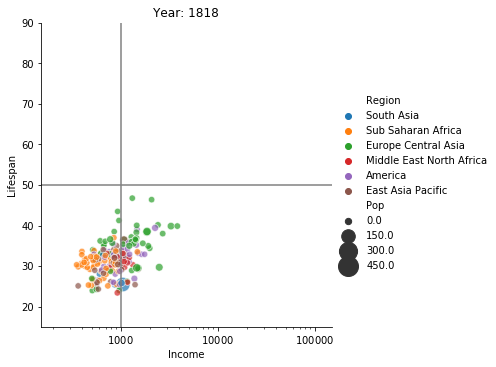

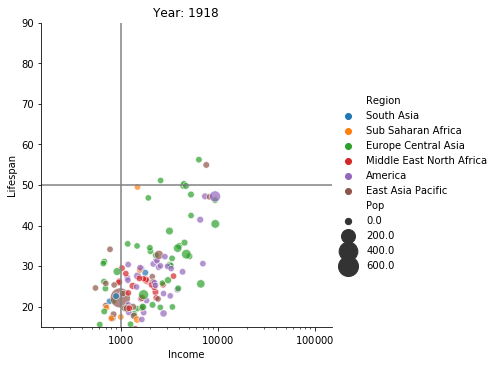

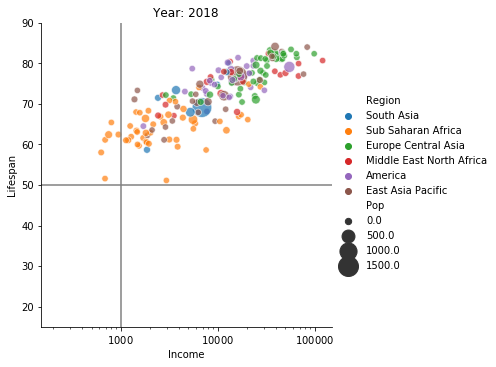

In [272]:
years = [1818,1918,2018]
# fig, ax = plt.subplots()

for year in years:
  ax = sns.relplot(x='Income',y='Lifespan',hue='Region', size='Pop', alpha=0.7,
             sizes=(40,400), data=df[df['Year']==year])

  plt.xscale('log')
  plt.title('Year: '+str(year))
  plt.xlim(150,150000)
  plt.ylim(15,90)
  plt.axhline(y=50, color='grey')
  plt.axvline(x=1000, color='grey')
  plt.xticks((1000,10000, 100000),('$1000$','$10000$','$100000$'))
#   plt.set_xscale('log')

#   ax.set_xscale('log')
#   plt.xticks([1000, 10000, 100000])
#   ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
#   ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:g}'.format(x))
                               
#   plt.show()

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [0]:
%matplotlib notebook

In [0]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

In [0]:
def animate(i):
  data = df.iloc[:int(i+1)] #select data range
#   p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
  sns.relplot(x='Income',y='Lifespan',hue='Region', size='Pop',
              data=df[df['Year']==year])
#   p.tick_params(labelsize=17)
#   plt.setp(p.lines,linewidth=7)

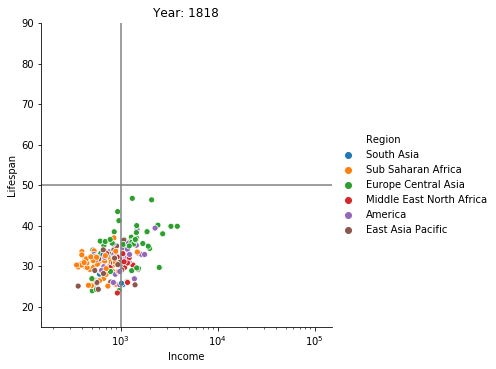

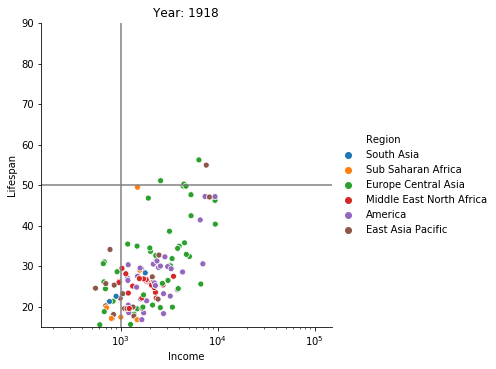

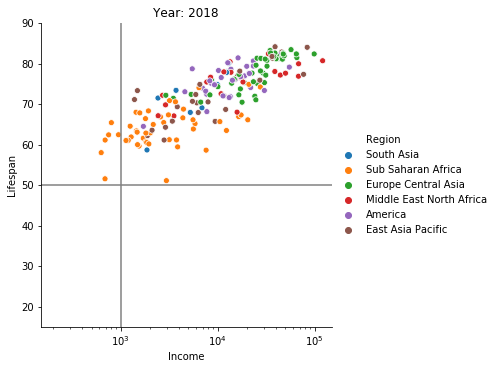

In [259]:
# fig = plt.figure()
# plt.xlim(150,150000)
# plt.ylim(15,90)
# plt.xlabel('Year',fontsize=20)
# plt.ylabel(title,fontsize=20)
# plt.title('Heroin Overdoses per Year',fontsize=20)


years = [1818,1918,2018]

for year in years:
  sns.relplot(x='Income',y='Lifespan',hue='Region', size='Pop',
             data=df[df['Year']==year])
  plt.xscale('log')
  plt.title('Year: '+str(year))
  plt.xlim(150,150000)
  plt.ylim(15,90)
  plt.axhline(y=50, color='grey')
  plt.axvline(x=1000, color='grey')  
  plt.show()

In [217]:
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)

NameError: ignored